In [1]:
import numpy as np
import os

from utils.plot_utils import *
from utils.mesh_utils import *
from utils.file_utils import *
from basis.spline import *

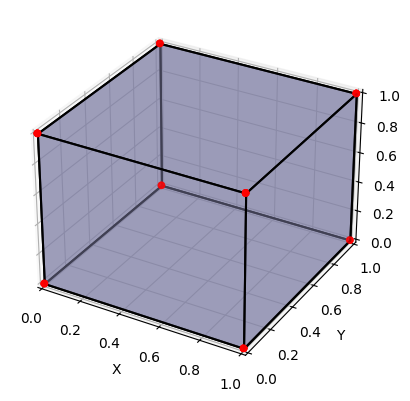

In [2]:
# Define the vertices of the unit hexahedron (cube)
hex_vertices = np.array([
    [0, 0, 0],  # Vertex 0
    [1, 0, 0],  # Vertex 1
    [1, 1, 0],  # Vertex 2
    [0, 1, 0],  # Vertex 3
    [0, 0, 1],  # Vertex 4
    [1, 0, 1],  # Vertex 5
    [1, 1, 1],  # Vertex 6
    [0, 1, 1]   # Vertex 7
])

# Define the faces of the hexahedron using the indices of the vertices
hex_faces = np.array([
    [0, 1, 2, 3],  # Bottom face
    [4, 5, 6, 7],  # Top face
    [0, 1, 5, 4],  # Front face
    [2, 3, 7, 6],  # Back face
    [1, 2, 6, 5],  # Right face
    [0, 3, 7, 4]   # Left face
])

hexes = np.array([
    [0, 1, 2, 3, 4, 5, 6, 7]  # Defining a single hexahedron
])

plot_mesh(hex_vertices, hex_faces)

[[0 1 2]
 [0 2 3]
 [4 5 6]
 [4 6 7]
 [0 1 5]
 [0 5 4]
 [2 3 7]
 [2 7 6]
 [1 2 6]
 [1 6 5]
 [0 3 7]
 [0 7 4]]


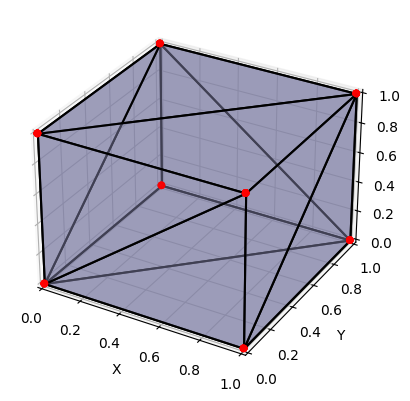

In [3]:
tri_vertices = hex_vertices
tri_faces, tri_edges = hex_to_triangle_mesh(hex_vertices, hex_faces)

print(tri_faces)
plot_mesh(tri_vertices, tri_faces)

In [4]:
# Number of sample points along each axis
num_points_per_side = 2  # For simple illustration; increase for finer resolution
u_sample = np.linspace(0, 1, num_points_per_side)
v_sample = np.linspace(0, 1, num_points_per_side)
w_sample = np.linspace(0, 1, num_points_per_side)

# Create a 3D grid of points
u_grid, v_grid, w_grid = np.meshgrid(u_sample, v_sample, w_sample, indexing='ij')
u_flat = u_grid.flatten()
v_flat = v_grid.flatten()
w_flat = w_grid.flatten()

# Compute W matrix
W = np.array([flatten_tensor_product_3d(tensor_product_linear_3d(u, v, w)) for u, v, w in zip(u_flat, v_flat, w_flat)])

print("W matrix shape:", W.shape)
print("W matrix:\n", W)

W matrix shape: (8, 8)
W matrix:
 [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [7]:
save_folder = '3d-hex'
save_path = os.path.join('/Users/liujunyu/Desktop/Research/UVic_NYU/IGA_IPC/code/polyfem/experiments/mesh/iga-ipc', save_folder)

save_hex_mesh_to_msh(hex_vertices, hexes, os.path.join(save_path, '3d-hex.msh'))
save_mesh_to_obj(tri_vertices, tri_faces, os.path.join(save_path, '3d-hex-collison.obj'))
path = os.path.join(save_path, '3d-hex-map.hdf5')
save_weights(path, W, n_fem_vertices=8, vertices=tri_vertices, edges=tri_edges, faces=tri_faces)